In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv(r'C:\Users\Bidisha\Desktop\hackathon\Final\Train.csv')

In [3]:
df_train.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code
0,0a29abf475fb8039d2775913d6f0b6f0,48436dade18ac8b2bce089ec2a041202,2017-08-05 16:59:05,2017-09-06 00:00:00,18.12,27.0,58.0,598.0,D,650,28,9,14,1.0,153.75,E,1,CLOTH20,GPAY20
1,903ac1be571f2dc655f9083ffc936ce6,5b51032eddd242adc84c38acab88f23d,2017-10-30 15:35:32,2017-11-24 00:00:00,20.08,55.0,59.0,695.0,B,3050,33,13,33,1.0,388.17,E,3,CLOTH20,CITI10
2,bfadadd0d97f4c52f859c1c4d809edf9,4a3ca9315b744ce9f8e9374361493884,2017-11-04 12:03:25,2017-11-30 00:00:00,2.29,14.0,54.0,245.0,A,1383,50,10,40,1.0,216.72,E,1,CLOTH20,GPAY20
3,6c9e6937792cc04d9bb23451e0ff9f48,4a3ca9315b744ce9f8e9374361493884,2017-06-15 11:46:47,2017-07-10 00:00:00,1.86,14.0,54.0,245.0,A,1383,50,10,40,1.0,228.95,E,1,CLOTH15,CITI10
4,906e77e04c502baf17ad58162217da39,4a3ca9315b744ce9f8e9374361493884,2018-01-03 09:14:25,2018-01-31 00:00:00,15.57,14.0,54.0,245.0,A,1383,50,10,40,1.0,243.51,E,2,CLOTH15,CITI10


In [4]:
df_train.describe()

,shipping_charges,product_category_code,X_1,X_2,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,transaction_type
count,7995.000000,7986.000000,7871.000000,7871.000000,8009.000000,8009.000000,8009.000000,8009.000000,7994.000000,7999.000000,8009.000000
mean,17.528816,35.446406,49.355609,657.180282,1518.710201,29.528031,14.410788,23.788238,1.019264,127.189734,2.791859
std,11.230212,21.561223,9.540988,480.678441,2230.299606,13.956180,9.135349,11.295288,0.204122,118.208656,2.571943
min,0.000000,0.000000,8.000000,41.000000,50.000000,11.000000,2.000000,7.000000,1.000000,10.000000,1.000000
25%,12.130000,14.000000,44.000000,340.000000,250.000000,18.000000,10.000000,14.000000,1.000000,64.000000,1.000000
50%,15.380000,34.000000,52.000000,519.000000,800.000000,25.000000,12.000000,20.000000,1.000000,94.480000,1.000000
75%,19.650000,55.000000,58.000000,903.000000,1750.000000,40.000000,20.000000,30.000000,1.000000,144.925000,4.000000
max,147.320000,73.000000,64.000000,3890.000000,23800.000000,105.000000,105.000000,92.000000,10.000000,1972.030000,24.000000


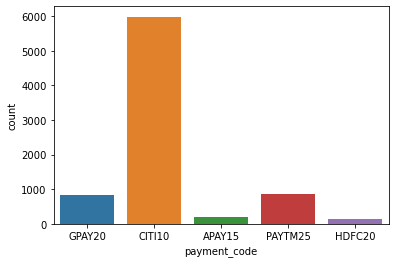

In [5]:
sns.countplot(x=df_train.payment_code)

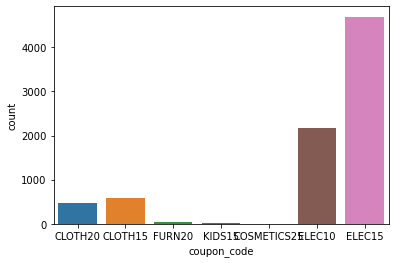

In [6]:
sns.countplot(x=df_train.coupon_code)

In [7]:
(df_train.isnull().sum()/df_train.shape[0])*100                      #percentage of null values in each column 

customer_id               0.000000
seller_id                 0.000000
order_checkout_date       0.000000
delivery_eta              0.000000
shipping_charges          0.174803
product_category_code     0.287177
X_1                       1.723062
X_2                       1.723062
product_quality_type      1.723062
product_mass              0.000000
product_length            0.000000
product_height            0.000000
product_breadth           0.000000
payment_emi_years(max)    0.187289
price                     0.124860
order_status              0.000000
transaction_type          0.000000
coupon_code               0.000000
payment_code              0.000000
dtype: float64

In [8]:
#Replacing the null values
val_X1=np.mean(df_train.X_1)
val_X2=np.mean(df_train.X_2)
df_train.X_1.fillna(val_X1,axis=0,inplace=True)
df_train.X_2.fillna(val_X2,axis=0,inplace=True)
df_train.product_quality_type.fillna(method='ffill',axis=0,inplace=True)
df_train.dropna(axis=0,inplace=True)

In [9]:
df_train['Volume']=df_train.product_breadth*df_train.product_height*df_train.product_length          #Calculating Volume 

In [10]:
df_train.drop(['product_breadth','product_height','product_length'],axis=1,inplace=True)

In [11]:
df_train.columns

Index(['customer_id', 'seller_id', 'order_checkout_date', 'delivery_eta',
       'shipping_charges', 'product_category_code', 'X_1', 'X_2',
       'product_quality_type', 'product_mass', 'payment_emi_years(max)',
       'price', 'order_status', 'transaction_type', 'coupon_code',
       'payment_code', 'Volume'],
      dtype='object')

In [12]:
df_train.dtypes

customer_id                object
seller_id                  object
order_checkout_date        object
delivery_eta               object
shipping_charges          float64
product_category_code     float64
X_1                       float64
X_2                       float64
product_quality_type       object
product_mass                int64
payment_emi_years(max)    float64
price                     float64
order_status               object
transaction_type            int64
coupon_code                object
payment_code               object
Volume                      int64
dtype: object

In [13]:
df_train[['product_category_code','transaction_type']]=df_train[['product_category_code','transaction_type']].astype('str')
    

In [14]:
df_train.nunique()                   #Number of unique values for each column 

customer_id               7947
seller_id                  503
order_checkout_date       7940
delivery_eta               400
shipping_charges          1926
product_category_code       52
X_1                         51
X_2                        721
product_quality_type        12
product_mass               319
payment_emi_years(max)       8
price                     3673
order_status                 5
transaction_type            15
coupon_code                  7
payment_code                 5
Volume                     569
dtype: int64

In [15]:
df_train.order_checkout_date=pd.to_datetime(df_train.order_checkout_date)
df_train.delivery_eta=pd.to_datetime(df_train.delivery_eta)

In [16]:
#Calculating order to delivery time 
df_train['Order_To_Delivery_Time']=df_train.delivery_eta.dt.date-df_train.order_checkout_date.dt.date

In [17]:
df_train.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,Volume,Order_To_Delivery_Time
0,0a29abf475fb8039d2775913d6f0b6f0,48436dade18ac8b2bce089ec2a041202,2017-08-05 16:59:05,2017-09-06,18.12,27.0,58.0,598.0,D,650,1.0,153.75,E,1,CLOTH20,GPAY20,3528,32 days
1,903ac1be571f2dc655f9083ffc936ce6,5b51032eddd242adc84c38acab88f23d,2017-10-30 15:35:32,2017-11-24,20.08,55.0,59.0,695.0,B,3050,1.0,388.17,E,3,CLOTH20,CITI10,14157,25 days
2,bfadadd0d97f4c52f859c1c4d809edf9,4a3ca9315b744ce9f8e9374361493884,2017-11-04 12:03:25,2017-11-30,2.29,14.0,54.0,245.0,A,1383,1.0,216.72,E,1,CLOTH20,GPAY20,20000,26 days
3,6c9e6937792cc04d9bb23451e0ff9f48,4a3ca9315b744ce9f8e9374361493884,2017-06-15 11:46:47,2017-07-10,1.86,14.0,54.0,245.0,A,1383,1.0,228.95,E,1,CLOTH15,CITI10,20000,25 days
4,906e77e04c502baf17ad58162217da39,4a3ca9315b744ce9f8e9374361493884,2018-01-03 09:14:25,2018-01-31,15.57,14.0,54.0,245.0,A,1383,1.0,243.51,E,2,CLOTH15,CITI10,20000,28 days


In [18]:
df_train.drop(['seller_id','order_checkout_date','delivery_eta'],axis=1,inplace=True)

In [19]:
df_train.set_index('customer_id',inplace=True)

In [20]:
df_train.head()

,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,Volume,Order_To_Delivery_Time
customer_id,,,,,,,,,,,,,,
0a29abf475fb8039d2775913d6f0b6f0,18.12,27.0,58.0,598.0,D,650,1.0,153.75,E,1,CLOTH20,GPAY20,3528,32 days
903ac1be571f2dc655f9083ffc936ce6,20.08,55.0,59.0,695.0,B,3050,1.0,388.17,E,3,CLOTH20,CITI10,14157,25 days
bfadadd0d97f4c52f859c1c4d809edf9,2.29,14.0,54.0,245.0,A,1383,1.0,216.72,E,1,CLOTH20,GPAY20,20000,26 days
6c9e6937792cc04d9bb23451e0ff9f48,1.86,14.0,54.0,245.0,A,1383,1.0,228.95,E,1,CLOTH15,CITI10,20000,25 days
906e77e04c502baf17ad58162217da39,15.57,14.0,54.0,245.0,A,1383,1.0,243.51,E,2,CLOTH15,CITI10,20000,28 days


In [21]:
from sklearn.preprocessing import LabelEncoder          #Assign numerical values to the different categorical variables 
labelenc=LabelEncoder()
df_train.product_quality_type=labelenc.fit_transform(df_train.product_quality_type)
df_train.order_status=labelenc.fit_transform(df_train.order_status)

In [22]:
#Label encoding Target variables
labelenc1=LabelEncoder()
labelenc2=LabelEncoder()
df_train.payment_code=labelenc1.fit_transform(df_train.payment_code)
df_train.coupon_code=labelenc2.fit_transform(df_train.coupon_code)

In [23]:
df_train.Order_To_Delivery_Time=df_train.Order_To_Delivery_Time.dt.days

In [24]:
df_train.head()

,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,payment_emi_years(max),price,order_status,transaction_type,coupon_code,payment_code,Volume,Order_To_Delivery_Time
customer_id,,,,,,,,,,,,,,
0a29abf475fb8039d2775913d6f0b6f0,18.12,27.0,58.0,598.0,3,650,1.0,153.75,1,1,1,2,3528,32
903ac1be571f2dc655f9083ffc936ce6,20.08,55.0,59.0,695.0,1,3050,1.0,388.17,1,3,1,1,14157,25
bfadadd0d97f4c52f859c1c4d809edf9,2.29,14.0,54.0,245.0,0,1383,1.0,216.72,1,1,1,2,20000,26
6c9e6937792cc04d9bb23451e0ff9f48,1.86,14.0,54.0,245.0,0,1383,1.0,228.95,1,1,0,1,20000,25
906e77e04c502baf17ad58162217da39,15.57,14.0,54.0,245.0,0,1383,1.0,243.51,1,2,0,1,20000,28


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=1000,random_state=42)
rf2=RandomForestClassifier(n_estimators=200,random_state=42, max_depth = 10)

X=df_train.drop(['payment_code','coupon_code'],axis=1)                     #All the independent variables 
Y1=df_train.payment_code                                                   #Target variable 1
Y2=df_train.coupon_code                                                    #Target variable 2

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.1, random_state=42)

In [28]:
rf1.fit(X1_train,y1_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [29]:
rf1.feature_importances_,X1_train.columns        #Importance of the different features

(array([0.13174994, 0.03277512, 0.04065692, 0.04698861, 0.01932766,
        0.04326356, 0.03988126, 0.15520749, 0.00473406, 0.21050968,
        0.04337202, 0.23153368]),
 Index(['shipping_charges', 'product_category_code', 'X_1', 'X_2',
        'product_quality_type', 'product_mass', 'payment_emi_years(max)',
        'price', 'order_status', 'transaction_type', 'Volume',
        'Order_To_Delivery_Time'],
       dtype='object'))

In [30]:
y1_test_pred=rf1.predict(X1_test)

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(y1_test,y1_test_pred,average='weighted')

0.7358490566037735

In [33]:
rf2.fit(X2_train,y2_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [34]:
rf2.feature_importances_,X1_train.columns

(array([0.10280671, 0.05680165, 0.06341651, 0.07273569, 0.0289975 ,
        0.09348208, 0.00431666, 0.39800245, 0.00166242, 0.03642641,
        0.08779455, 0.05355737]),
 Index(['shipping_charges', 'product_category_code', 'X_1', 'X_2',
        'product_quality_type', 'product_mass', 'payment_emi_years(max)',
        'price', 'order_status', 'transaction_type', 'Volume',
        'Order_To_Delivery_Time'],
       dtype='object'))

In [35]:
y2_test_pred=rf2.predict(X2_test)

In [36]:
recall_score(y2_test,y2_test_pred,average='weighted')

0.610062893081761

In [37]:
df_test=pd.read_csv(r'C:\Users\Bidisha\Desktop\hackathon\Final\Test.csv')

In [38]:
df_test.head()

,customer_id,seller_id,order_checkout_date,delivery_eta,shipping_charges,product_category_code,X_1,X_2,product_quality_type,product_mass,product_length,product_height,product_breadth,payment_emi_years(max),price,order_status,transaction_type
0,d6b757c9478ed7366a42b6f09dce476f,d93919c944be9cff128f6c9cb899eacb,2017-12-20 23:34:29,2018-01-15 00:00:00,18.38,7.0,39.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
1,9c224bc2354a4e8ecbd390cba06b5d07,d93919c944be9cff128f6c9cb899eacb,2018-01-07 16:38:24,2018-02-23 00:00:00,50.15,7.0,39.0,749.0,A,4450,50,8,45,1.0,120.05,E,2
2,5551ca919431fc78c6bb85ee6f57c904,d93919c944be9cff128f6c9cb899eacb,2018-01-06 13:23:46,2018-02-01 00:00:00,18.38,7.0,39.0,749.0,A,4450,50,8,45,1.0,88.28,E,1
3,77b4e2a15303756cc2a3b4a5d2dd3460,d93919c944be9cff128f6c9cb899eacb,2018-02-07 23:55:11,2018-03-19 00:00:00,39.55,7.0,39.0,749.0,A,4450,50,8,45,1.0,119.45,E,2
4,6b9c954ac26835161d0f34df89ca1175,23613d49c3ac2bd302259e55c06c050c,2018-02-04 12:11:39,2018-03-01 00:00:00,11.85,55.0,39.0,161.0,C,200,20,20,20,1.0,45.50,E,2


In [39]:
(df_test.isnull().sum()/df_test.shape[0])*100

customer_id               0.000000
seller_id                 0.000000
order_checkout_date       0.000000
delivery_eta              0.000000
shipping_charges          0.385976
product_category_code     0.257317
X_1                       1.350917
X_2                       1.350917
product_quality_type      1.350917
product_mass              0.000000
product_length            0.000000
product_height            0.000000
product_breadth           0.000000
payment_emi_years(max)    0.225153
price                     0.241235
order_status              0.000000
transaction_type          0.000000
dtype: float64

In [40]:
val_X1=np.mean(df_test.X_1)
val_X2=np.mean(df_test.X_2)
df_test.X_1.fillna(val_X1,axis=0,inplace=True)
df_test.X_2.fillna(val_X2,axis=0,inplace=True)
df_test.fillna(method='ffill',axis=0,inplace=True)

In [41]:
df_test[['product_category_code','transaction_type']]=df_test[['product_category_code','transaction_type']].astype('str')

In [42]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
df_test.product_quality_type=labelenc.fit_transform(df_test.product_quality_type)
df_test.order_status=labelenc.fit_transform(df_test.order_status)

In [43]:
df_test['Volume']=df_test.product_breadth*df_test.product_height*df_test.product_length
df_test.drop(['product_breadth','product_height','product_length'],axis=1,inplace=True)

In [44]:
df_test.order_checkout_date=pd.to_datetime(df_test.order_checkout_date)
df_test.delivery_eta=pd.to_datetime(df_test.delivery_eta)
df_test['Order_To_Delivery_Time']=df_test.delivery_eta.dt.date-df_test.order_checkout_date.dt.date
df_test.drop(['seller_id','order_checkout_date','delivery_eta'],axis=1,inplace=True)


In [45]:
df_test.set_index('customer_id',inplace=True)

In [46]:
df_test.Order_To_Delivery_Time=df_test.Order_To_Delivery_Time.dt.days

In [47]:
y1_pred=pd.Series(rf1.predict(df_test))                          #Predicting payment code 

In [48]:
y2_pred=pd.Series(rf2.predict(df_test))                         #Predicting coupon code

In [49]:
df_test['Coupon_code']=y2_pred.values
df_test['payment_code']=y1_pred.values

In [50]:
df_test['payment_code_real']=labelenc1.inverse_transform(df_test.payment_code)
df_test['coupon_code_real']=labelenc2.inverse_transform(df_test.Coupon_code)

In [51]:
final_file=df_test[['payment_code_real','coupon_code_real']]

In [52]:
final_file.to_csv('Bidisha.csv')